# **Import**

## **Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, accuracy_score, 
    mean_absolute_error, 
    mean_squared_error, 
    explained_variance_score,
    f1_score
)

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import time

## **Importing Datasets**

In [2]:
# data = pd.read_csv('datasets/UNSW_NB15.csv')
# data.head(n=5)
# data.info()

normalized_data = pd.read_csv('../processed_data/normalized_data.csv')
X = normalized_data.drop("attack_cat", axis=1).values
y = normalized_data["attack_cat"].values

In [3]:
X

array([[2.02463370e-03, 4.69704086e-04, 3.63042294e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.08317020e-02, 1.22123062e-03, 3.44890180e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.70521550e-02, 6.57585721e-04, 1.45216918e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.50000028e-07, 9.39408173e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [4]:
y

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

# **Data Preprocessing**

In [5]:
# data[data['service']=='-']

## Replace '-' with np.nan (NaN), inplace=True
## Change on original set - no copy created

In [6]:
# data['service'].replace('-',np.nan,inplace=True)

In [7]:
# data.isnull().sum()

In [8]:
# data.shape

## Delete rows that have any field with NaN value

In [9]:
# data.dropna(inplace=True)

In [10]:
# data.shape

In [11]:
# data['attack_cat'].value_counts()

In [12]:
# data['state'].value_counts()

In [13]:
# data

In [14]:
# features = pd.read_csv('datasets/UNSW_NB15_features.csv')

In [15]:
# features.head()

In [16]:
# features['Type '] = features['Type '].str.lower()

In [17]:
# nominal_names = features['Name'][features['Type ']=='nominal']
# integer_names = features['Name'][features['Type ']=='integer']
# binary_names = features['Name'][features['Type ']=='binary']
# float_names = features['Name'][features['Type ']=='float']

## print(nomial_names)
0          srcip
2          dstip
4          proto
5          state
13       service
47    attack_cat
Name: Name, dtype: object

In [18]:
# # selecting common column names from dataset and feature dataset
# cols = data.columns
# nominal_names = cols.intersection(nominal_names)
# integer_names = cols.intersection(integer_names)
# binary_names = cols.intersection(binary_names)
# float_names = cols.intersection(float_names)

## Show columns
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

## Converting integer columns to numeric


In [19]:
# for c in integer_names:
#   pd.to_numeric(data[c])

## Converting binary columns to numeric


In [20]:
# for c in binary_names:
#   pd.to_numeric(data[c])

## Converting float columns to numeric


In [21]:
# for c in float_names:
#   pd.to_numeric(data[c])

In [22]:
# data.info()

In [23]:
# data

# **Data Visualization**

## **Multi-class Classification**

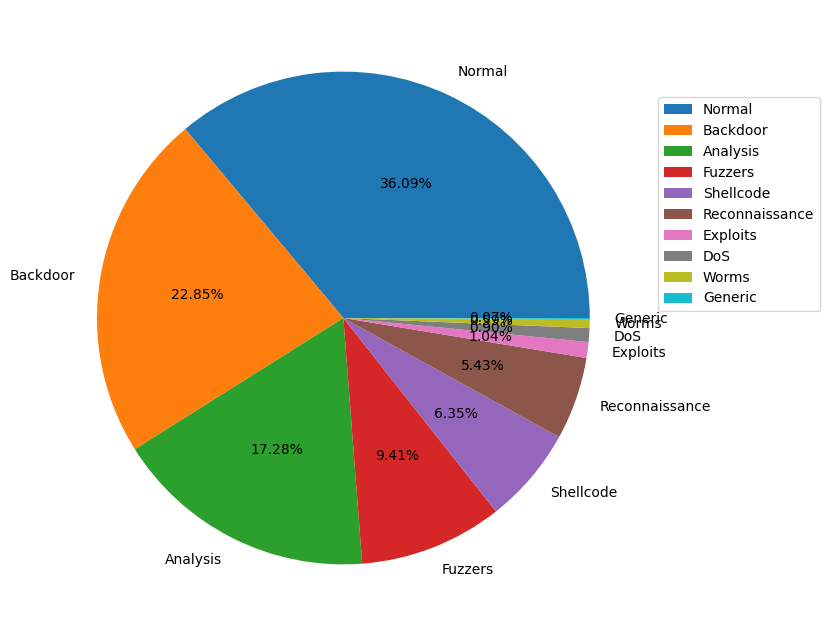

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(normalized_data.attack_cat.value_counts(), labels=normalized_data.attack_cat.unique(), autopct='%0.2f%%')  # Names are taken from attack types arranged from top to bottomplt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))    
plt.savefig('../plots/Pie_chart_multi.png')
plt.show()

## **One hot encoding**

In [25]:
# # Column with value is number
# num_col = data.select_dtypes(include='number').columns  

# # selecting categorical data attributes
# cat_col = data.columns.difference(num_col)
# cat_col = cat_col[1:]   # Get from column 1 to end - remove attack_cat
# cat_col

In [26]:
# # creating a dataframe with only categorical attributes
# data_cat = data[cat_col].copy()     
# data_cat.head()

In [27]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
# data_cat = pd.get_dummies(data_cat,columns=cat_col)    # Convert all cat_col columns to binary values 

In [28]:
# data_cat.head()

In [29]:
# data.shape

In [30]:
# data = pd.concat([data, data_cat],axis=1)   # Join 2 data tables horizontally (axis=1) - (+12 columns in data_cat)

In [31]:
# data.shape

In [32]:
# data.drop(columns=cat_col,inplace=True)  # Remove columns in cat_col list: proto, service, state

In [33]:
# data.shape

# **Data Normalization**

In [34]:
# # selecting numeric attributes columns from data
# num_col = list(data.select_dtypes(include='number').columns)  # Assign num_col as list
# num_col.remove('id')
# num_col.remove('label')
# print(num_col)

In [35]:
# # using minmax scaler for normalizing data
# minmax_scale = MinMaxScaler(feature_range=(0, 1))   # Normalize data to 0-1 format
# def normalization(df,col):   
#   for i in col:
#     arr = df[i]     
#     arr = np.array(arr) 
#     df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
#   return df

## Data before normalization


In [36]:
# data.head()

## Calling normalization() function


In [37]:
# data = normalization(data.copy(),num_col)

## Data after normalization


In [38]:
# data.head()

# **Label Encoding**

## **Multi-class Labels**

### One-hot-encoding attack label


In [39]:
# multi_data = data.copy()
# multi_label = pd.DataFrame(multi_data.attack_cat)

In [40]:
# multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])
# multi_data.head()

In [41]:
# # label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
# le2 = preprocessing.LabelEncoder()
# enc_label = multi_label.apply(le2.fit_transform)
# multi_data['label'] = enc_label
# multi_data['label']

In [42]:
# le2.classes_

In [43]:
# np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

# **Correlation between features of dataset**

In [44]:
# num_col.append('label')
# print(num_col)

## **Correlation Matrix for Multi-class Labels**

In [45]:
# num_col = list(multi_data.select_dtypes(include='number').columns)
# print(num_col)

In [46]:
# multi_data.info()

## Correlation Matrix for Multi-class Labels


In [47]:
# plt.figure(figsize=(20,8))
# corr_multi = multi_data[num_col].corr()
# sns.heatmap(corr_multi,vmax=1.0,annot=False)
# plt.title('Correlation Matrix for Multi Labels',fontsize=16)
# plt.savefig('plots/correlation_matrix_multi.png')
# plt.show()

# **Feature Selection**

## **Multi-class Labels**

In [48]:
# # finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
# corr_ymulti = abs(corr_multi['label'])
# highest_corr_multi = corr_ymulti[corr_ymulti > 0.3]
# highest_corr_multi.sort_values(ascending=True)

In [49]:
# # selecting attributes found by using pearson correlation coefficient
# multi_cols = highest_corr_multi.index
# multi_cols

In [50]:
# # Multi-class labelled Dataset
# multi_data = multi_data[multi_cols].copy()
# multi_data

### **Saving Prepared Dataset to Disk**

In [51]:
# multi_data.to_csv('./datasets/multi_data.csv')

# **MULTI-CLASS CLASSIFICATION**

## **Data Splitting**

In [52]:
# X = multi_data.drop(columns=['label'],axis=1)
# Y = multi_data['label']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
label_encoder = LabelEncoder()

In [55]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [56]:
# y_train.value_counts()

## **Logistic Regression**

In [57]:
logr_multi = LogisticRegression(random_state=42, max_iter=5000, solver='newton-cg',multi_class='multinomial')

# Start time
start_time = time.time()

logr_multi.fit(X_train, y_train_encoded)

# End time
end_time = time.time()

d:\ML\env311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [58]:
y_pred_encoded = logr_multi.predict(X_test)

# **Confusion Maxtrix**

In [59]:
target_names=[
    'Analysis', 
    'Backdoor', 
    'DoS', 
    'Exploits', 
    'Fuzzers', 
    'Generic', 
    'Normal', 
    'Reconnaissance', 
    'Shellcode', 
    'Worms'
]

In [60]:
# Create confusion matrix
confusion_matrix_result = confusion_matrix(y_test_encoded, y_pred_encoded, labels=np.arange(len(target_names)))
confusion_matrix_result

array([[   18,     0,    16,   359,    48,     0,    78,     0,     0,
            0],
       [    0,     1,    18,   346,    63,     0,    17,    23,     0,
            0],
       [    0,     0,   141,  2802,   141,    25,   107,    76,     0,
            0],
       [    0,     1,   191,  7717,   445,    33,   473,   220,     0,
            0],
       [    0,     0,    19,   534,  2064,    18,  1882,   314,     0,
            0],
       [    0,     0,     0,   197,    61, 11238,    23,    18,     0,
            0],
       [    2,     0,     0,   431,   870,     1, 16898,   411,     0,
            0],
       [    0,     0,    32,   768,   103,     7,   265,  1677,     0,
            0],
       [    0,     0,     0,     3,    50,     0,    53,   203,     0,
            0],
       [    0,     0,     0,    21,     2,    10,     0,     1,     0,
            0]], dtype=int64)

In [61]:
# Compute confusion matrix
def plot_confusion_matrix(
        cm,
        target_names,
        title='Confusion matrix',
        cmap=None,
        normalize=True
):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

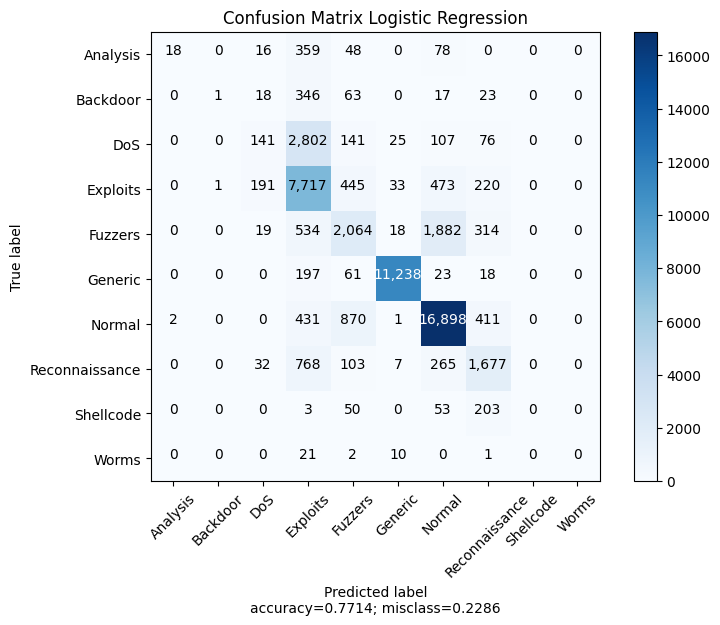

In [62]:
# Plot confusion matrix
plot_confusion_matrix(
    confusion_matrix_result, 
    normalize=False,
    target_names=target_names, 
    title="Confusion Matrix Logistic Regression"
)

# **Caculate metrics**

In [63]:
# Training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 61.61 seconds


In [64]:
# Tính Detection Rate và False Positive Rate
tp = np.diag(confusion_matrix_result)  # True Positives
fn = np.sum(confusion_matrix_result, axis=1) - tp  # False Negatives
fp = np.sum(confusion_matrix_result, axis=0) - tp  # False Positives

In [65]:
detection_rate = tp / (tp + fn)
fpr = fp / (fp + np.sum(confusion_matrix_result, axis=1) - tp)
df = pd.DataFrame({"Class": target_names, "False Positive Rate": fpr, "Detection Rate": detection_rate})

# Hiển thị bảng
print(df)

            Class  False Positive Rate  Detection Rate
0        Analysis             0.003976        0.034682
1        Backdoor             0.002137        0.002137
2             DoS             0.080537        0.042831
3        Exploits             0.800264        0.849890
4         Fuzzers             0.391868        0.427241
5         Generic             0.239186        0.974083
6          Normal             0.628225        0.907860
7  Reconnaissance             0.518640        0.588008
8       Shellcode             0.000000        0.000000
9           Worms             0.000000        0.000000


In [66]:
print("Mean Absolute Error - " , mean_absolute_error(y_test_encoded, y_pred_encoded))
print("Mean Squared Error - " , mean_squared_error(y_test_encoded, y_pred_encoded))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test_encoded, y_pred_encoded)))
print("R2 Score - " , explained_variance_score(y_test_encoded, y_pred_encoded)*100)
print("F1 Score - ", f1_score(y_test_encoded, y_pred_encoded, average='weighted') * 100)
print("Accuracy - ",accuracy_score(y_test_encoded, y_pred_encoded)*100)

Mean Absolute Error -  0.4589114194236926
Mean Squared Error -  1.2065974580382264
Root Mean Squared Error -  1.098452301212131
R2 Score -  49.54149675627829
F1 Score -  74.2177707778564
Accuracy -  77.13980789754535


In [67]:
print(classification_report(y_test_encoded, y_pred_encoded, target_names=target_names))

                precision    recall  f1-score   support

      Analysis       0.90      0.03      0.07       519
      Backdoor       0.50      0.00      0.00       468
           DoS       0.34      0.04      0.08      3292
      Exploits       0.59      0.85      0.69      9080
       Fuzzers       0.54      0.43      0.48      4831
       Generic       0.99      0.97      0.98     11537
        Normal       0.85      0.91      0.88     18613
Reconnaissance       0.57      0.59      0.58      2852
     Shellcode       0.00      0.00      0.00       309
         Worms       0.00      0.00      0.00        34

      accuracy                           0.77     51535
     macro avg       0.53      0.38      0.38     51535
  weighted avg       0.75      0.77      0.74     51535



d:\ML\env311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML\env311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML\env311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Saving Trained Model to Disk**

In [68]:
pkl_filename = "../models/logistic_regressor_multi.h5"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(logr_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


## **Linear Support Vector Machine**

In [69]:
lsvm_multi = SVC(kernel='linear', gamma='auto')

# Start time
start_time = time.time()

lsvm_multi.fit(X_train, y_train_encoded)

# End time
end_time = time.time()
training_time = end_time -start_time

In [70]:
y_pred_encoded = lsvm_multi.predict(X_test)

# **Confusion maxtrix**

In [71]:
target_names=[
    'Analysis', 
    'Backdoor', 
    'DoS', 
    'Exploits', 
    'Fuzzers', 
    'Generic', 
    'Normal', 
    'Reconnaissance', 
    'Shellcode', 
    'Worms'
]

In [72]:
# Create confusion matrix
confusion_matrix_result = confusion_matrix(y_test_encoded, y_pred_encoded, labels=np.arange(len(target_names)))
confusion_matrix_result

array([[   14,     0,     3,   423,     1,     0,    78,     0,     0,
            0],
       [    0,     1,     0,   421,     6,     0,    21,    19,     0,
            0],
       [    0,     3,    22,  3052,    49,    17,    84,    65,     0,
            0],
       [    0,     4,    44,  8232,   218,    22,   398,   162,     0,
            0],
       [    0,     0,     2,   800,  1185,    12,  2608,   224,     0,
            0],
       [    0,     0,     1,   216,    39, 11229,    37,    15,     0,
            0],
       [    1,     0,     0,   416,   421,     1, 17437,   337,     0,
            0],
       [    0,     0,     2,   885,    66,     7,   277,  1615,     0,
            0],
       [    0,     0,     0,     5,    26,     0,   101,   177,     0,
            0],
       [    0,     0,     0,    32,     2,     0,     0,     0,     0,
            0]], dtype=int64)

In [73]:
# Compute confusion matrix
def plot_confusion_matrix(
        cm,
        target_names,
        title='Confusion matrix',
        cmap=None,
        normalize=True
):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

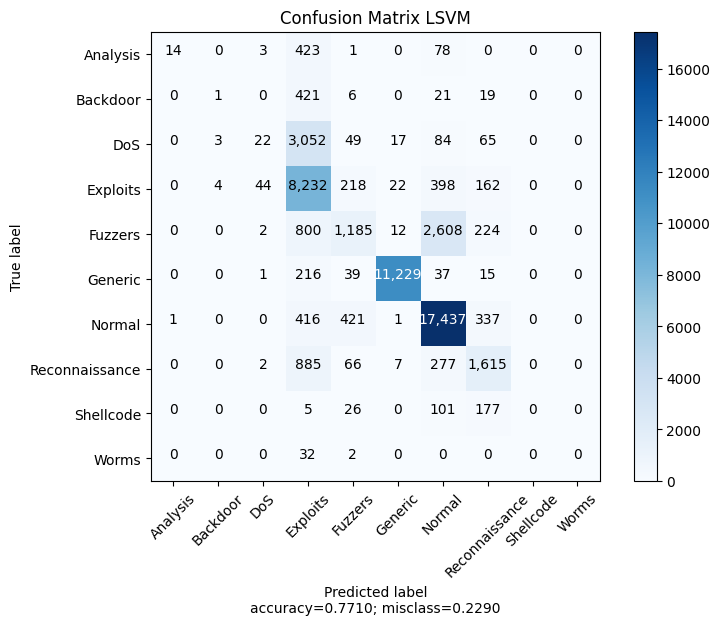

In [74]:
# Plot confusion matrix
plot_confusion_matrix(
    confusion_matrix_result, 
    normalize=False,
    target_names=target_names, 
    title="Confusion Matrix LSVM"
)

# **Caculate metrics**

In [75]:
# Training time
print(f"Training time: {training_time/60:.2f} minutes")

Training time: 54.24 minutes


In [76]:
# Tính Detection Rate và False Positive Rate
tp = np.diag(confusion_matrix_result)  # True Positives
fn = np.sum(confusion_matrix_result, axis=1) - tp  # False Negatives
fp = np.sum(confusion_matrix_result, axis=0) - tp  # False Positives

In [77]:
detection_rate = tp / (tp + fn)
fpr = fp / (fp + np.sum(confusion_matrix_result, axis=1) - tp)
df = pd.DataFrame({"Class": target_names, "False Positive Rate": fpr, "Detection Rate": detection_rate})

# Hiển thị bảng
print(df)

            Class  False Positive Rate  Detection Rate
0        Analysis             0.001976        0.026975
1        Backdoor             0.014768        0.002137
2             DoS             0.015653        0.006683
3        Exploits             0.880530        0.906608
4         Fuzzers             0.185069        0.245291
5         Generic             0.160763        0.973303
6          Normal             0.753975        0.936818
7  Reconnaissance             0.446780        0.566269
8       Shellcode             0.000000        0.000000
9           Worms             0.000000        0.000000


In [78]:
# Hiển thị báo cáo phân loại
print(classification_report(y_test_encoded, y_pred_encoded, target_names=target_names))

                precision    recall  f1-score   support

      Analysis       0.93      0.03      0.05       519
      Backdoor       0.12      0.00      0.00       468
           DoS       0.30      0.01      0.01      3292
      Exploits       0.57      0.91      0.70      9080
       Fuzzers       0.59      0.25      0.35      4831
       Generic       0.99      0.97      0.98     11537
        Normal       0.83      0.94      0.88     18613
Reconnaissance       0.62      0.57      0.59      2852
     Shellcode       0.00      0.00      0.00       309
         Worms       0.00      0.00      0.00        34

      accuracy                           0.77     51535
     macro avg       0.50      0.37      0.36     51535
  weighted avg       0.74      0.77      0.73     51535



d:\ML\env311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML\env311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ML\env311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
print("Mean Absolute Error - " , mean_absolute_error(y_test_encoded, y_pred_encoded))
print("Mean Squared Error - " , mean_squared_error(y_test_encoded, y_pred_encoded))
print("Root Mean Squared Error - " , np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded)))
print("R2 Score - " , explained_variance_score(y_test_encoded, y_pred_encoded)*100)
print("F1 Score - ", f1_score(y_test_encoded, y_pred_encoded, average='weighted') * 100)
print("Accuracy - ", accuracy_score(y_test_encoded, y_pred_encoded)*100)

Mean Absolute Error -  0.4516348112932958
Mean Squared Error -  1.1645483651887067
Root Mean Squared Error -  1.079142421179293
R2 Score -  51.49486963889902
F1 Score -  72.75824344894689
Accuracy -  77.10293974968468


In [80]:
# print(classification_report(y_test_encoded, y_pred_encoded, target_names=le2.classes_))

### **Saving Trained Model to Disk**

In [81]:
pkl_filename = "../models/lsvm_multi.h5"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


## **Multi Layer Perceptron**

In [82]:
mlp_multi = MLPClassifier(random_state=123, solver='adam', max_iter=8000)

# Start time
start_time = time.time()

mlp_multi.fit(X_train, y_train_encoded)

# End time
end_time = time.time()
training_time = end_time - start_time

In [83]:
y_pred_encoded = mlp_multi.predict(X_test)

# **Confusion matrix**

In [84]:
target_names=[
    'Analysis', 
    'Backdoor', 
    'DoS', 
    'Exploits', 
    'Fuzzers', 
    'Generic', 
    'Normal', 
    'Reconnaissance', 
    'Shellcode', 
    'Worms'
]

In [85]:
# Create confusion matrix
confusion_matrix_result = confusion_matrix(y_test_encoded, y_pred_encoded, labels=np.arange(len(target_names)))
confusion_matrix_result

array([[   25,     1,    85,   277,    30,     0,   101,     0,     0,
            0],
       [    0,     6,    75,   331,    39,     0,    11,     4,     2,
            0],
       [    0,     7,   687,  2405,    62,    15,    83,    18,    15,
            0],
       [    5,     6,   830,  7487,   243,    23,   312,   137,    37,
            0],
       [    0,     2,    78,   504,  2078,     3,  2108,    47,    11,
            0],
       [    0,     0,    33,   177,    18, 11280,    23,     3,     1,
            2],
       [    7,     0,     1,    94,   498,     7, 17914,    76,    16,
            0],
       [    0,     0,   111,   565,    20,     2,    52,  2098,     4,
            0],
       [    0,     0,     3,    46,    13,     2,    60,    40,   145,
            0],
       [    0,     0,     0,    27,     0,     0,     0,     0,     0,
            7]], dtype=int64)

In [86]:
# Compute confusion matrix
def plot_confusion_matrix(
        cm,
        target_names,
        title='Confusion matrix',
        cmap=None,
        normalize=True
):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

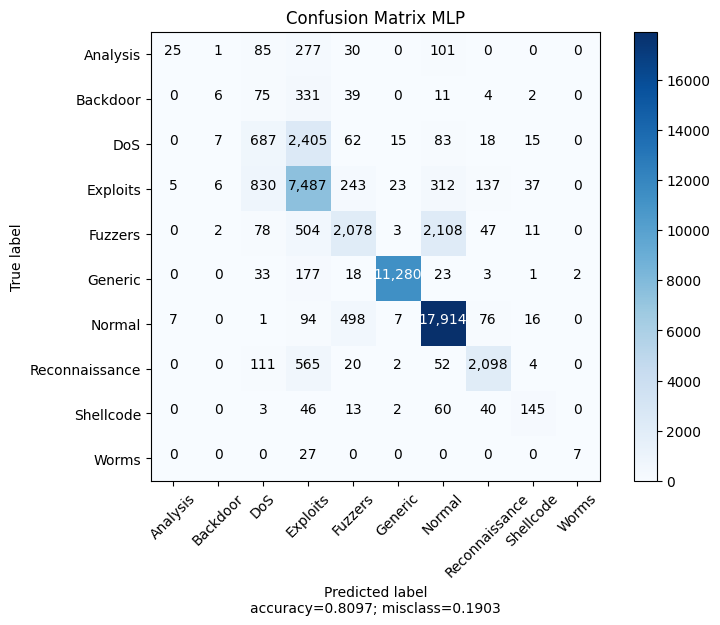

In [87]:
# Plot confusion matrix
plot_confusion_matrix(
    confusion_matrix_result, 
    normalize=False,
    target_names=target_names, 
    title="Confusion Matrix MLP"
)

# **Caculate metrics**

In [88]:
# Training time
print(f"Training time: {training_time/60:.2f} minutes")

Training time: 8.52 minutes


In [89]:
# Tính Detection Rate và False Positive Rate
tp = np.diag(confusion_matrix_result)  # True Positives
fn = np.sum(confusion_matrix_result, axis=1) - tp  # False Negatives
fp = np.sum(confusion_matrix_result, axis=0) - tp  # False Positives

In [90]:
detection_rate = tp / (tp + fn)
fpr = fp / (fp + np.sum(confusion_matrix_result, axis=1) - tp)
df = pd.DataFrame({"Class": target_names, "False Positive Rate": fpr, "Detection Rate": detection_rate})

# Hiển thị bảng
print(df)

            Class  False Positive Rate  Detection Rate
0        Analysis             0.023715        0.048170
1        Backdoor             0.033473        0.012821
2             DoS             0.318241        0.208688
3        Exploits             0.735338        0.824559
4         Fuzzers             0.251088        0.430139
5         Generic             0.168285        0.977724
6          Normal             0.797333        0.962446
7  Reconnaissance             0.301205        0.735624
8       Shellcode             0.344000        0.469256
9           Worms             0.068966        0.205882


In [91]:
# Hiển thị báo cáo phân loại
print(classification_report(y_test_encoded, y_pred_encoded, target_names=target_names))

                precision    recall  f1-score   support

      Analysis       0.68      0.05      0.09       519
      Backdoor       0.27      0.01      0.02       468
           DoS       0.36      0.21      0.26      3292
      Exploits       0.63      0.82      0.71      9080
       Fuzzers       0.69      0.43      0.53      4831
       Generic       1.00      0.98      0.99     11537
        Normal       0.87      0.96      0.91     18613
Reconnaissance       0.87      0.74      0.80      2852
     Shellcode       0.63      0.47      0.54       309
         Worms       0.78      0.21      0.33        34

      accuracy                           0.81     51535
     macro avg       0.68      0.49      0.52     51535
  weighted avg       0.80      0.81      0.79     51535



In [92]:
print("Mean Absolute Error - " , mean_absolute_error(y_test_encoded, y_pred_encoded))
print("Mean Squared Error - " , mean_squared_error(y_test_encoded, y_pred_encoded))
print("Root Mean Squared Error - " , np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded)))
print("R2 Score - " , explained_variance_score(y_test_encoded, y_pred_encoded)*100)
print("F1 Score - ", f1_score(y_test_encoded, y_pred_encoded, average='weighted')*100)
print("Accuracy - ",accuracy_score(y_test_encoded, y_pred_encoded)*100)

Mean Absolute Error -  0.3719025904724944
Mean Squared Error -  0.9799941787134957
Root Mean Squared Error -  0.9899465534631128
R2 Score -  59.00221490761206
F1 Score -  79.11961501887616
Accuracy -  80.96827398855146


### **Saving Trained Model to Disk**

In [93]:
pkl_filename = "../models/mlp_multi.h5"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp_multi, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk
